# Feature Scaling

### Why do we need Feature Scaling : 
Because features with bigger values will dominate the features with smaller values in ML Algorithms where distance between points are calculated like in KNN, LR etc

## Types of Feature Scaling : 
- Standardisation ( Z-Score Normalisation )
- Normalisation

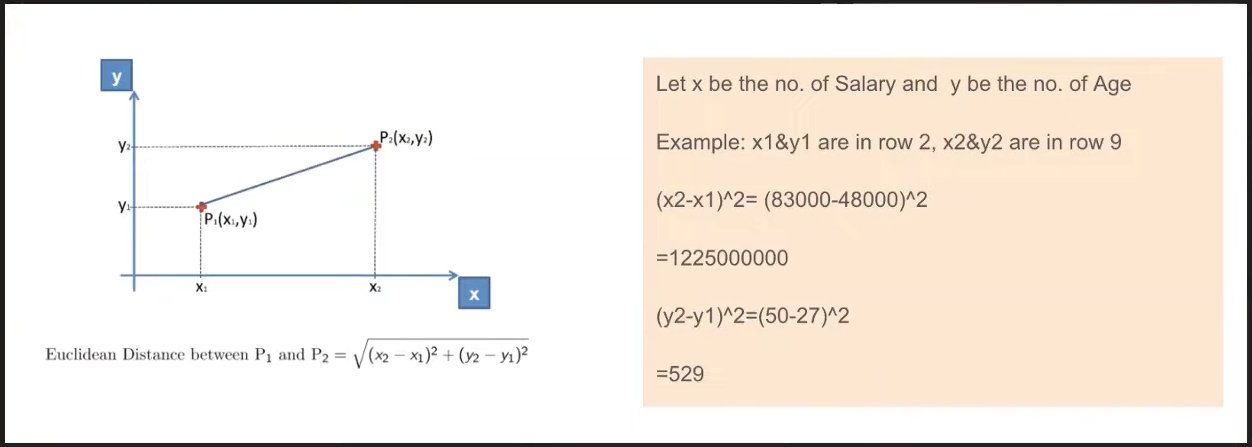

# Standardisation ( Z-Score Normalisation )

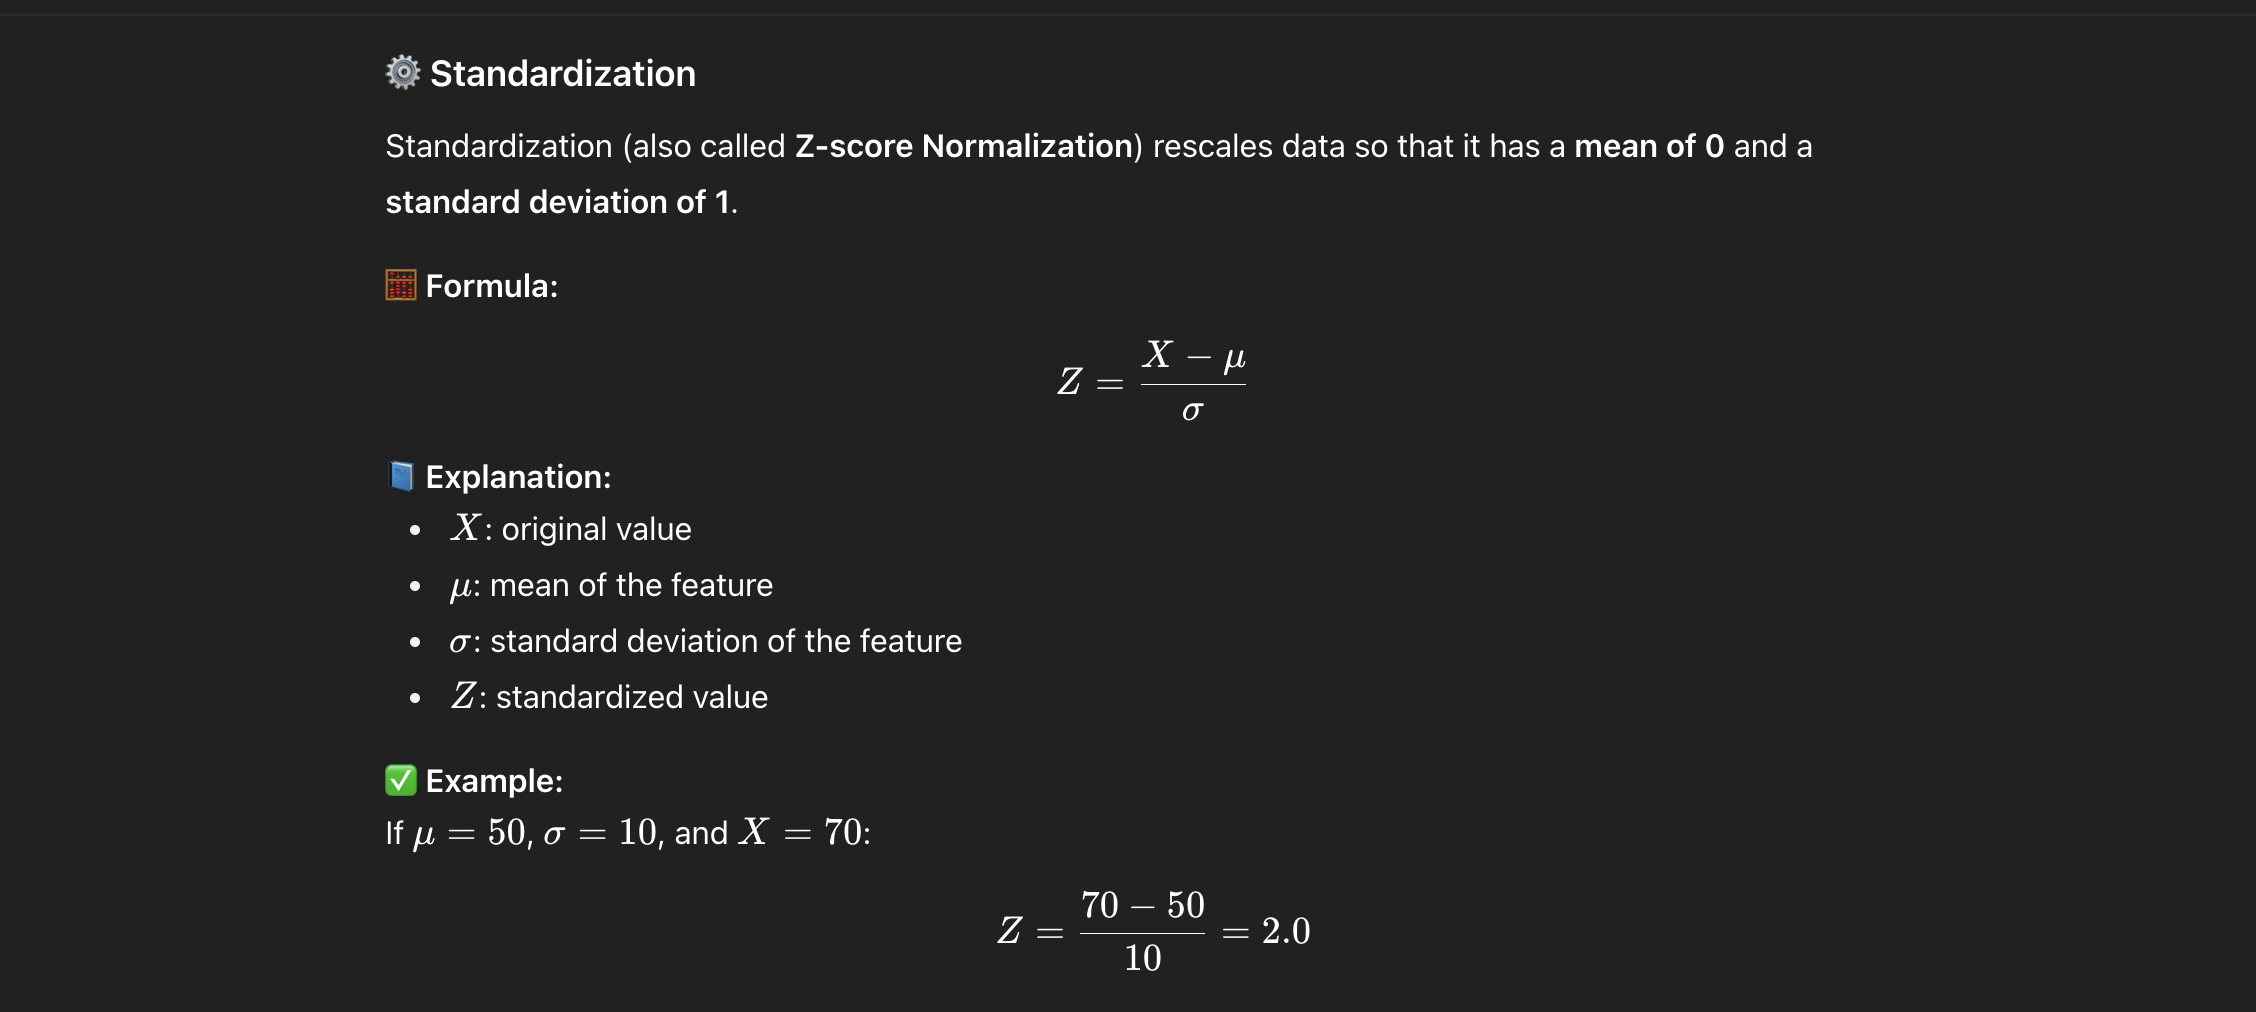

In [43]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load the dataset
df = pd.read_csv("Social_Network_Ads.csv")

In [45]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [46]:
# Remove the User ID and Gender Column
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
# Split the features and columns
X = df.iloc[:,:2]
y = df['Purchased']

In [50]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [51]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [53]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [55]:
# Standardisation Process

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Learn from the train dataset by fitting the training data
scaler.fit(X_train)

# Transform both the training and the test dataset. The transform method will return a numpy array
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert it into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [61]:
# Building a training the Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [64]:
# Evaluate the model performance
from sklearn.metrics import accuracy_score

print(f"Accuracy Score without scaling {accuracy_score(y_test, y_pred)}")
print(f"Accuracy Score with scaling {accuracy_score(y_test, y_pred_scaled)}")

Accuracy Score without scaling 0.8875
Accuracy Score with scaling 0.8625


In [ ]:
# Scaling performs better in case of KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

print("KNN without scaling:", accuracy_score(y_test, knn.predict(X_test)))
print("KNN with scaling:", accuracy_score(y_test, knn_scaled.predict(X_test_scaled)))

KNN without scaling: 0.825
KNN with scaling: 0.9125


# Understanding Scaling Using Graphs

Text(0.5, 1.0, 'Before Scaling')

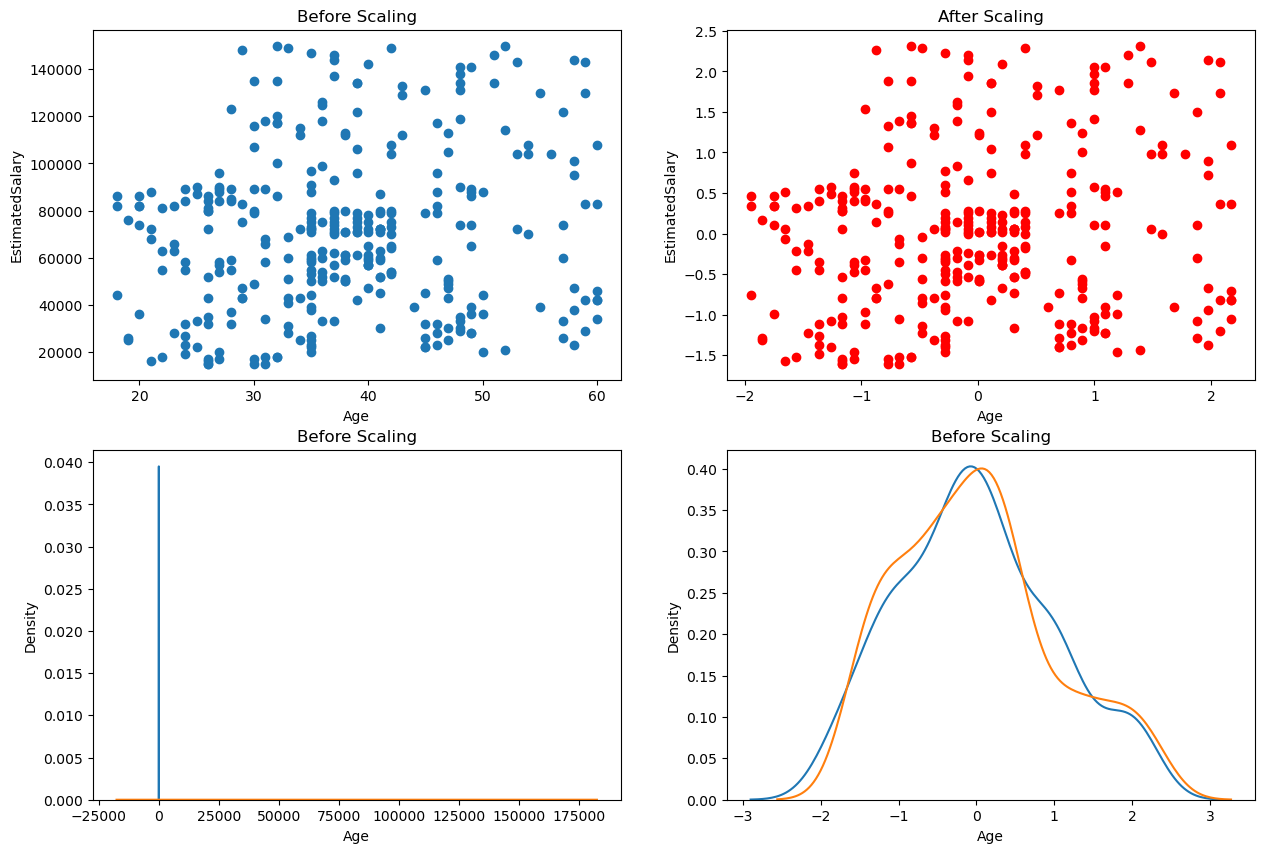

In [79]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15,10))

# Plot 1
ax[0,0].scatter(X_train['Age'],X_train["EstimatedSalary"])
ax[0,0].set_xlabel("Age")
ax[0, 0].set_ylabel("EstimatedSalary")
ax[0,0].set_title("Before Scaling")

# Plot 2
ax[0,1].scatter(X_train_scaled['Age'],X_train_scaled["EstimatedSalary"], color = "red")
ax[0, 1].set_title("After Scaling")
ax[0, 1].set_xlabel("Age")
ax[0, 1].set_ylabel("EstimatedSalary")

# Plot 3
sns.kdeplot(X_train["Age"], ax = ax[1,0])
sns.kdeplot(X_train["EstimatedSalary"], ax = ax[1,0])
ax[1, 0].set_title("Before Scaling")

# Plot 4
sns.kdeplot(X_train_scaled["Age"], ax=ax[1, 1])
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax[1, 1])
ax[1, 1].set_title("Before Scaling")

## Add outliers and check

In [80]:
df = pd.concat(
    [
        df,
        pd.DataFrame(
            {
                "Age": [5, 90, 95],
                "EstimatedSalary": [1000, 250000, 350000],
                "Purchased": [0, 1, 1],
            }
        ),
    ],
    ignore_index=True,
)

In [82]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


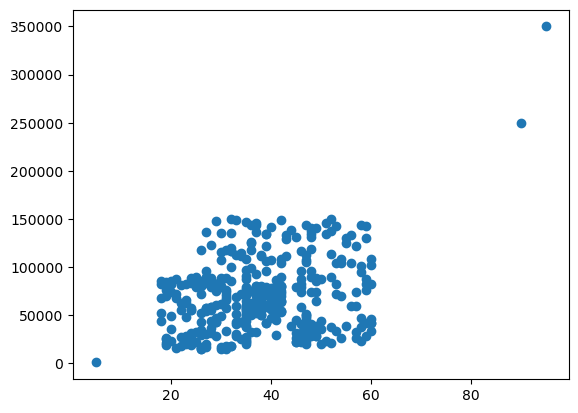

In [83]:
plt.scatter(df["Age"], df["EstimatedSalary"])

In [84]:
X = df.iloc[:,:2]
y = df["Purchased"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=0
)

In [86]:
X_train.shape, X_test.shape

((282, 2), (121, 2))

,Age,EstimatedSalary
125,39,61000
153,36,50000
400,5,1000
276,38,71000
86,24,55000
73,33,113000
38,26,72000
188,35,72000
221,35,91000
3,27,57000


In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

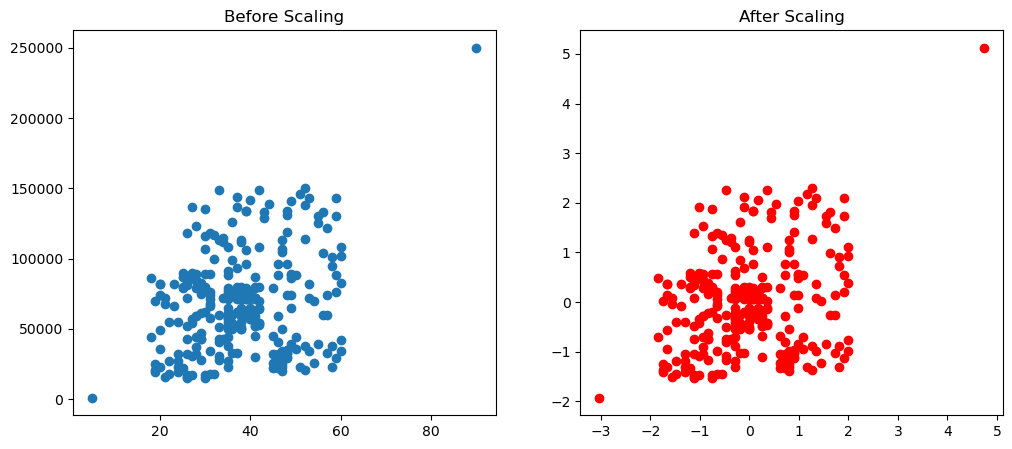

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color="red")
ax2.set_title("After Scaling")
plt.show()

### Hence there is no effect of scaling on outliers, the distribution of data remains the same after scaling and we have to handle outliers explicitly